In [1]:
import numpy as np
import matplotlib.pyplot as plt

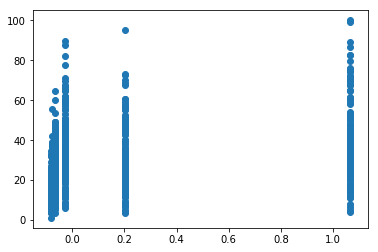

In [2]:
#define fractions of B/A/F/G/K/M stars
fB=1./6.
fA=1./6.
fF=1./6.
fG=1./6.
fK=1./6.
fM=1./6.
ageB=0.05 #Gyr
ageA=0.5
ageF=1.5
ageG=5.
ageK=13. #idk what to put for these because they stay on the main sequence for 50 Gyr
ageM=13. #same with these but it's like 200 Gyr

#for a population of 100 stars:
nstars=1000
speeds=np.zeros(nstars)
metals=np.zeros(nstars)
for i in np.arange(nstars):
    #1. randomly draw stellar type/age
    selectprob=np.random.rand()
    #2. use age to draw metallicity and velocity from appropriate dispersion
    if selectprob<fB:
        age=ageB
        sx=10. #km/s
        sy=9.
        sz=6.
        metals[i]=0.1
    elif selectprob<(fB+fA):
        age=ageA
        sx=15.
        sy=9.
        sz=9.
        metals[i]=0.1
    elif selectprob<(fB+fA+fF):
        age=ageF
        sx=24.
        sy=13.
        sz=10.
        metals[i]=0.05
    elif selectprob<(fB+fA+fF+fG):
        age=ageG
        sx=26.
        sy=18.
        sz=20.
        metals[i]=0.0
    elif selectprob<(fB+fA+fF+fG+fK):
        age=ageK
        sx=28.
        sy=16.
        sz=11.
        metals[i]=-1.4
    elif selectprob<(fB+fA+fF+fG+fK+fM):
        age=ageM
        sx=32.
        sy=21.
        sz=19.
        metals[i]=-1.4
    vx=np.random.normal(0,sx)
    vy=np.random.normal(0,sy)
    vz=np.random.normal(0,sz)
    speed=np.sqrt(vx**2.+vy**2.+vz**2.)
#     metallicity=0.0115*age-0.0836 #dex
    speeds[i]=speed
#     metals[i]=metallicity

plt.figure()
plt.scatter(metals,speeds)
plt.show()